# __Meshing in DFN.Lab__

### Problem statement


In order to compute the flow in a fractured system, it is required to first mesh the DFN.
<br>
The goal of this tutorial is to show how to use the Mesh module and generate a conforming mesh.

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/mesh.png" width="800"/>
</div>
<br>
Meshing a DFN
</center>

### Theoretical background

The reader is assumed to be familiar to the concept of Delaunay triangulation.
<br>
The meshing in DFN.Lab is based on MMG2D from the [MMG platform](https://www.mmgtools.org/) software.


In DFN.Lab, a mesh is composed by sets of non-overlapping triangles. Intersecting fractures share nodes along the intersection (conforming mesh). The mesh algorithm maintain all fractures and all intersections without any prior requirements.
<br>
A gradation coefficient $h$ is used to coarsen the mesh away from intersection lines or fracture tips, according to the following:
<br>
Let $e_1$ and $e_2$ be two adjacent edges that do not belong to the geometry, then the mesh elements size is controlled by a gradation coefficient $h$, so that:
$$ \frac{1}{h} \leq \frac{e_1}{e_2} \leq h $$
[See the MMG documentation for more explanations](https://www.mmgtools.org/mmg-remesher-try-mmg/mmg-remesher-options/mmg-remesher-option-hgrad)

The number of elements controls the memory requirement and the computational burden. The number of elements is steered by the parameter "characteristic length". 

### What will you learn ?

- How to generate a mesh from a DFN
- Control the number elements in the mesh
- Save a mesh
- Load a mesh

### DFN.Lab model

The goal of this tutorial is to generate a mesh on fractures from a given DFN.
<br>
Since meshing isolated fractures is not necessary for flow and transport simulations, one may ensure that the DFN contains only the connected fractures.


The required module is __Mesh__.

In [1]:
import dfnlab.Mesh as mesh 

----------------------------------------

## Example 1: Create a coarse mesh

#### Import a DFN

First, we initialize the system, made of a cubic domain and import the DFN from a disk file.

In [2]:
import pyvista
import dfnlab.System as sys 
import dfnlab.Domains as dom 
import dfnlab.Fractures as dfn
import dfnlab.IO as io
import os 

system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=1.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)
io.load_DFN_file(fnet, 'sources/Ktest.disk', format="disk") 
system.build()

Let's have a look at our network.

In [3]:
from sources.functions import plot_dfn
plot_dfn(system)

#### Mesh the DFN

We build a _Mesh_ object, using the _System_ as argument.

In [4]:
mesh1 = mesh.Mesh(system)  

The meshing procedure depends on a few parameters which control the number of elements of the mesh
<br>
These parameters are described below. A detailed description is also available in the documentation.

The characteristic length is related to the size of triangles. In this example, it is $0.1$. <br/>
The gradation coefficient $h$ is set to $1.2$.

In [5]:
mesh1.setCaracteristicLength(0.1)
mesh1.setGradationCoefficient(1.2)  

We can now generate the mesh from the system.

In [6]:
mesh1.generate();

And visualize it.

In [7]:
from sources.functions import plot_mesh
plot_mesh(mesh1)

The number of elements is:

In [8]:
print("Number of mesh elements: {}".format(mesh1.numTriangles()))

Number of mesh elements: 1608


----------------------------------------

## Example 2: Create a fine mesh

In this example, the characteristic length is reduced to $0.02$. <br/>
We create an adaptive mesh by refining it on intersection lines, specifying a characteristic length 3 times smaller than the global characteristic length. <br/>
The gradation coefficient $h$ is set to $1.2$.

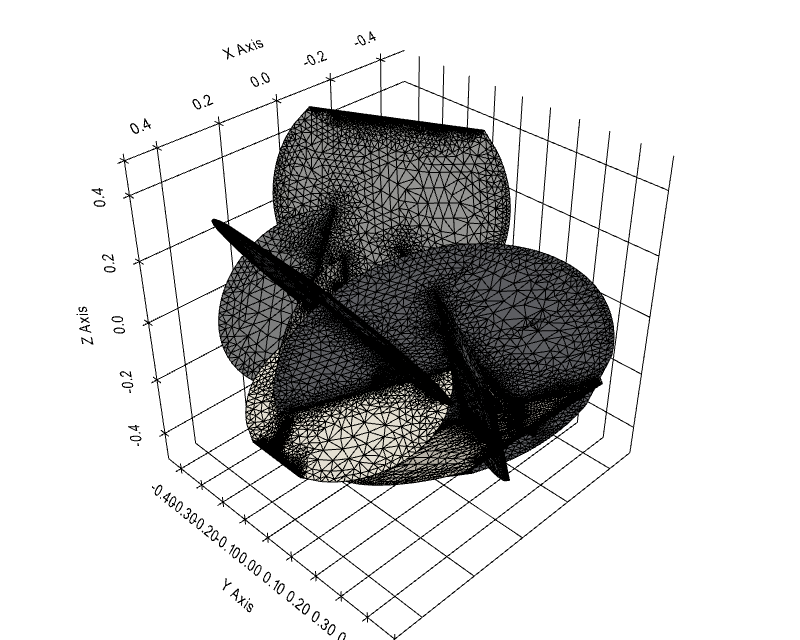

In [9]:
mesh2 = mesh.Mesh(system)  
mesh2.setCaracteristicLength(0.02)
mesh2.setRefinementIntersection(3)
mesh2.setGradationCoefficient(1.2)  
mesh2.generate()  

from sources.functions import plot_mesh
plot_mesh(mesh2)

The number of elements is:

In [10]:
print("Number of mesh elements: {}".format(mesh2.numTriangles()))

Number of mesh elements: 61931


## Save and read a mesh

The generation of meshes can be computationally intensive. DFN.Lab can save and read meshes to files.

In [11]:
path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"+"/mesh/"

if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
mesh2.save(pathFolder)

To restore a mesh, we start from an empty mesh object.

In [12]:
mesh3 = mesh.Mesh(system)  
mesh3.load(pathFolder)

number of intersections 24
updateTrianglesEdges
recoverIntersections


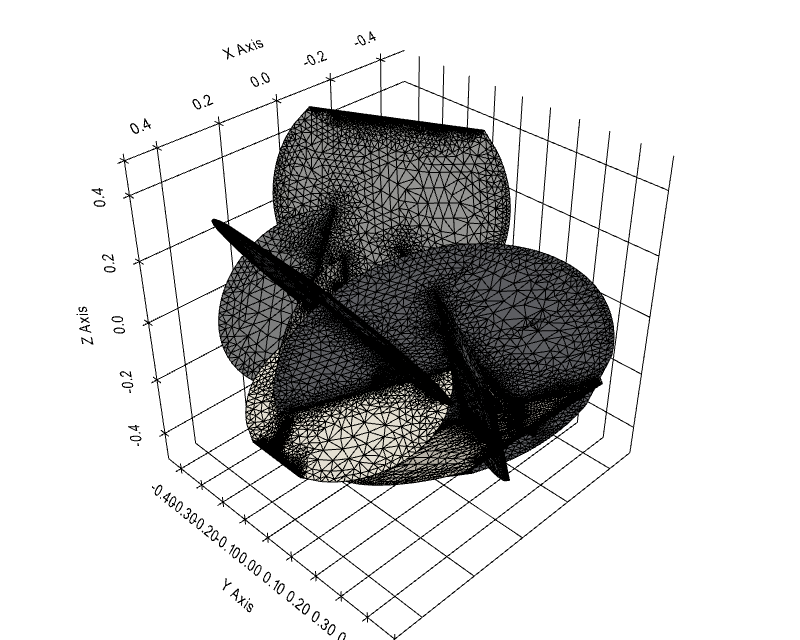

In [13]:
from sources.functions import plot_mesh
plot_mesh(mesh3)